# 10.3 Final Analysis

#### Import libraries and dataframe - input 1
#### Visualization: Distribution of age-range - input 16
#### Visualization: Distribution of income-range - input 21
#### Visulaization: Distribution of parental-status - input 20
#### Aggregation: max, min, mean of each profile for usage frequency and expenditure - input 25
#### Customer profiles by regions and department ID - input 33

Importing libraries and dataframe

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = path = r'C:\Users\Neena Tilton\Dropbox\Projects\01_2020_InstacartBasket'

In [3]:
df_main = pd.read_pickle(os.path.join(path, '02_Data', 'PreparedData', 'df_main.pkl'))

In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 34 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_time_of_day              int64   
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int64   
 9   product_name                   object  
 10  aisle_id                       int64   
 11  department_id                  int64   
 12  prices                         float64 
 13  busiest_day                    category
 14  Busiest_days                   category
 15  busiest_period_of_day          category
 16  max_order                      int64   
 17  loyalty_flag             

Creating visualizations to show the distribution of profiles:

Distribution of age-ranges

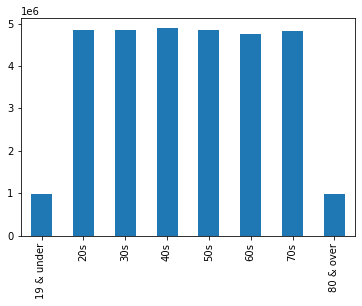

In [16]:
age_profile_dist = df_main['profile_age'].value_counts().sort_index().plot.bar()

Distribution of income-ranges

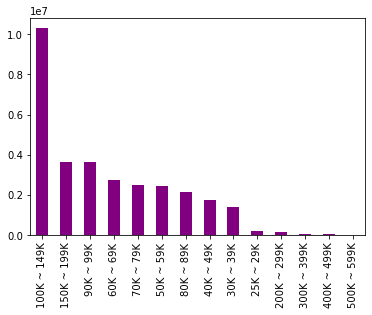

In [21]:
income_profile_dist = df_main['profile_income'].value_counts().plot.bar(color = 'purple')

Distribution of parental-status

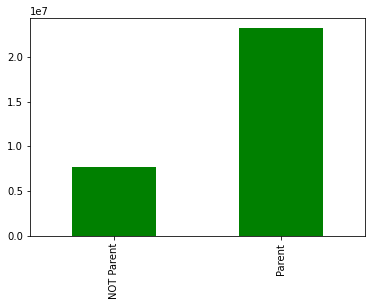

In [20]:
parent_profile_dist = df_main['profile_parental'].value_counts().sort_index().plot.bar(color = 'green')

Exporting visualizations

In [22]:
age_profile_dist.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'age_profile_dist.png'))

In [23]:
income_profile_dist.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'age_profile_dist.png'))

In [24]:
parent_profile_dist.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'age_profile_dist.png'))

Aggregating the max, min, and mean on a customer-profile level for usage frequency and expenditure:

In [25]:
# Aggregating on customer age-profile for usage frequency 
df_main.groupby('profile_age').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                     mean  min   max
profile_age                                         
19 & under                       9.951190  0.0  30.0
20s                              9.940831  0.0  30.0
30s                              9.956554  0.0  30.0
40s                              9.957307  0.0  30.0
50s                              9.988608  0.0  30.0
60s                              9.940412  0.0  30.0
70s                              9.968703  0.0  30.0
80 & over                        9.914425  0.0  30.0

In [26]:
# Aggregating on customer age-profile for expenditure 
df_main.groupby('profile_age').agg({'mean_price_of_product': ['mean', 'min', 'max']})

mean_price_of_product                        
                             mean       min           max
profile_age                                              
19 & under              10.220901  2.133333   1717.904274
20s                     12.596669  1.628571  10209.987755
30s                     11.884014  1.000000   5271.136842
40s                     12.271280  1.733333  15006.940000
50s                     11.780440  1.000000   6390.138298
60s                     11.535232  1.308333   3695.987705
70s                     12.186193  1.262500  14042.512281
80 & over               10.364117  2.000000   1619.122581

In [27]:
# Aggregating on customer income-profile for usage frequency 
df_main.groupby('profile_income').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                        mean  min   max
profile_income                                         
100K ~ 149K                         9.917035  0.0  30.0
150K ~ 199K                         9.842473  0.0  30.0
200K ~ 299K                         8.988294  1.0  30.0
25K ~ 29K                          10.955434  0.0  30.0
300K ~ 399K                         8.957253  1.0  30.0
30K ~ 39K                          10.610253  0.0  30.0
400K ~ 499K                         9.433738  1.0  30.0
40K ~ 49K                          10.397253  0.0  30.0
500K ~ 599K                         8.985579  1.0  30.0
50K ~ 59K                          10.061164  0.0  30.0
60K ~ 69K                           9.775218  0.0  30.0
70K ~ 79K                           9.827330  0.0  30.0
80K ~ 89K                           9.952529  0.0  30.0
90K ~ 99K                           9.887470  0.0  30.0

In [28]:
# Aggregating on customer income-profile for expenditure 
df_main.groupby('profile_income').agg({'mean_price_of_product': ['mean', 'min', 'max']})

mean_price_of_product                         
                                mean        min           max
profile_income                                               
100K ~ 149K                10.359624   7.000000  14042.512281
150K ~ 199K                17.114203   7.000000  15006.940000
200K ~ 299K               249.509782  24.103300   7414.485185
25K ~ 29K                   6.532603   1.773333      7.000000
300K ~ 399K               297.889212  24.405998   4924.385246
30K ~ 39K                   6.498834   1.000000      7.000000
400K ~ 499K               259.214441  25.423455   6388.812766
40K ~ 49K                   6.895623   1.000000     13.878571
500K ~ 599K               169.945440  27.570080   1434.962857
50K ~ 59K                   7.620147   1.300000     21.272202
60K ~ 69K                   7.955745   7.000000     22.256974
70K ~ 79K                   7.959641   7.000000     20.548482
80K ~ 89K                   8.418027   7.000000   3453.431034
90K ~ 99K                   9.706377   7.000000   5135.893590

In [29]:
# Aggregating on customer parental-profile for usage frequency 
df_main.groupby('profile_parental').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                          mean  min   max
profile_parental                                         
NOT Parent                            9.936569  0.0  30.0
Parent                                9.963995  0.0  30.0

In [30]:
# Aggregating on customer parental-profile for expenditure 
df_main.groupby('profile_parental').agg({'mean_price_of_product': ['mean', 'min', 'max']})

mean_price_of_product                   
                                  mean  min           max
profile_parental                                         
NOT Parent                   12.102657  1.0  15006.940000
Parent                       11.877157  1.0  10209.987755

In [31]:
# Aggregating on customer family-status-profile for usage frequency 
df_main.groupby('fam_status').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                                          mean  min   max
fam_status                                                               
divorced/widowed                                      9.874549  0.0  30.0
living with parents and siblings                      9.869971  0.0  30.0
married                                               9.970400  0.0  30.0
single                                                9.968773  0.0  30.0

In [32]:
# Aggregating on customer family-status-profile for expenditure 
df_main.groupby('fam_status').agg({'mean_price_of_product': ['mean', 'min', 'max']})

mean_price_of_product                        
                                                  mean       min           max
fam_status                                                                    
divorced/widowed                             11.532741  1.308333  14042.512281
living with parents and siblings             10.890167  2.133333  10209.987755
married                                      11.944390  1.000000   7414.485185
single                                       12.398586  1.000000  15006.940000

Comparing you customer profiles with regions and departments:

In [33]:
xtab_region_age = pd.crosstab(df_main['region'], df_main['profile_age'], dropna = False)

In [35]:
xtab_region_age

profile_age,19 & under,20s,30s,40s,50s,60s,70s,80 & over
region,,,,,,,,
Midwest,216918,1138920,1127163,1174801,1148268,1108493,1113493,233457
Northeast,175766,848218,847753,859566,849153,843815,869833,170581
South,329011,1631640,1647596,1601124,1580347,1590747,1621320,309354
West,252839,1224291,1224995,1247688,1264003,1218566,1229640,265205


In [42]:
xtab_region_age.to_clipboard()

In [36]:
xtab_region_parental = pd.crosstab(df_main['region'], df_main['profile_parental'], dropna = False)

In [37]:
xtab_region_parental

profile_parental,NOT Parent,Parent
region,,
Midwest,1822816,5438697
Northeast,1354482,4110203
South,2581933,7729206
West,1980450,5946777


In [43]:
xtab_region_parental.to_clipboard()

In [38]:
xtab_region_income = pd.crosstab(df_main['region'], df_main['profile_income'], dropna = False)

In [39]:
xtab_region_income

profile_income,100K ~ 149K,150K ~ 199K,200K ~ 299K,25K ~ 29K,300K ~ 399K,30K ~ 39K,400K ~ 499K,40K ~ 49K,500K ~ 599K,50K ~ 59K,60K ~ 69K,70K ~ 79K,80K ~ 89K,90K ~ 99K
region,,,,,,,,,,,,,,
Midwest,2482598,853402,33510,53250,14196,320333,8762,410181,7625,557332,633170,570677,501691,814786
Northeast,1838754,637624,24671,33075,8757,250049,3270,304013,3408,432997,466674,420355,389823,651215
South,3373485,1207014,51918,65037,19291,487067,7868,590468,4369,823412,883554,852485,722676,1222495
West,2617290,943093,44014,42508,10789,360706,8027,445867,3667,626455,734385,627598,528782,934046


In [40]:
xtab_region_dptmt = pd.crosstab(df_main['region'], df_main['department_id'], dropna = False)

In [41]:
xtab_region_dptmt

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
region,,,,,,,,,,,,,,,,,,,,,
Midwest,498225,7983,261753,2134115,34043,60666,598979,21358,193463,7929,...,158260,420334,156155,237459,1212490,166992,95741,645143,234464,15563
Northeast,370436,6268,199300,1593004,25017,44678,462929,17734,143817,5599,...,118571,312731,117904,176936,914616,124604,72712,493154,178398,11512
South,709906,11579,371620,3027476,48813,84649,859419,29909,272813,11180,...,224120,591754,223172,337458,1723016,230061,139511,916780,333620,21787
West,543164,8581,288155,2324678,36754,65998,650574,24059,212043,8743,...,173830,457886,173619,260221,1327060,178200,102428,711329,257352,15906


In [44]:
xtab_region_dptmt.to_clipboard()